# Support Vector Machines - SVM
## Laboratorio 3

## [Fraude en el Vino](https://en.wikipedia.org/wiki/Wine_fraud)

El fraude en el vino se relaciona a los aspectos comerciales del vino.  El tipo más prevalente de fraude es aquel en el cual los vinos son adulterados, generalmente con la adición de productos más baratos (e.g. jugos) y, a veces, con químicos dañinos y endulcorantes (para compensar el color o sabor).

La falsificación y la re-etiquetación de vinos inferiores y más baratos haciéndolos parecer marcas más caras es otro tipo común de fraude con vino.

<img src="wine.jpg">

## Objetivos del Laboratorio

Una compañía distribuidora, que recientemente fue víctima de fraude, ha completado una auditoría de varias muestras de vino a través del uso de análisis químico.  La compañía se especializa en la exportación de vinos de una calidad extremadamente alta y muy valiosos.  El fraude fue cometido por un proveedor que intentó pasar vinos baratos, de calidad inferior, como vinos de más alta gama.  La compañía distribuidora los ha contratado a Ustedes para intentar crear un modelo de aprendizaje de máquina (ML) que pueda ayudar a detectar muestras de vino de calidad baja ("fraude").  Quieren saber si siquiera es posible detectar tal diferencia.  


Fuente de datos: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**La meta general es utilizar el conjunto de datos adjunto para desarrollar un modelo que intenta predecir si un vino es legítimo "Legit" o fraudulento "Fraud" basado en varias características químicas.**

---
---

**Rubrica**

**(50 puntos) Análisis Exploratorio:**
* Identifica el tipo de archivo .data y la forma de leerlo
* Estudia las variables cuantitativas mediante técnicas de estadística descriptiva
* Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos
* Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.
* Estudia las variables categóricas
* Elabora gráficos de barra, tablas de frecuencia y de proporciones
* Elabora gráficos adecuados según el tipo de dato que representan
* Explica muy bien todos los procedimientos y los hallazgos que va haciendo.
* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos

**(36 puntos) Clasificación**
* Realiza varios modelos de Clasificación, analiza los resultados para identificar el de mejor rendimiento
        
**(14 puntos) Hallazgos y conclusiones.**
* Hace la recomendación correcta para la Compañía Distribuidora

**NOTA:  Al usar SVC, anteriormente hemos dejado el modelo en blanco, (e.g. sin parámeteros).  Sin embargo, en estos datos las clases no están balanceadas.  Para intentar remediar este problema, podemos ajustar automáticamente los pesos de forma inversamente proporcional a las frecuencias de las clases en los datos con una llamada en la invocación de SVC().  Ver la [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) en-línea y averiguen cuál es el argumento\parámetro.**

---------------------------------------------------------------------------------------------------

1. Identifica el tipo de archivo .data y la forma de leerlo

In [26]:
import pandas as pd

data = pd.read_csv('wine_fraud.csv')

2.Estudia las variables cuantitativas mediante técnicas de estadística descriptiva

In [27]:
# Obtener estadísticas descriptivas de las variables cuantitativas
quant_vars = data.select_dtypes(include='number')
desc_stats = quant_vars.describe()

# Imprimir las estadísticas descriptivas
print(desc_stats)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

3. Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos

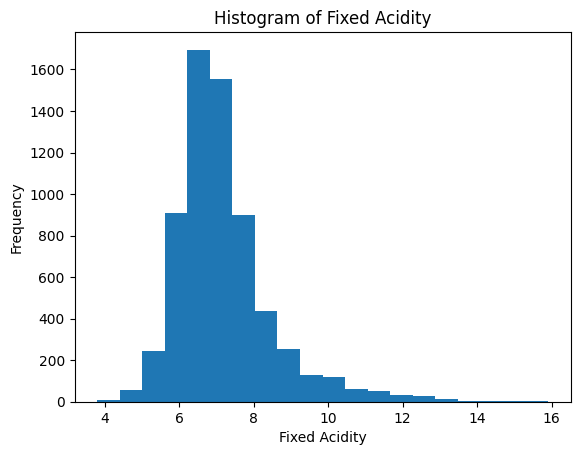

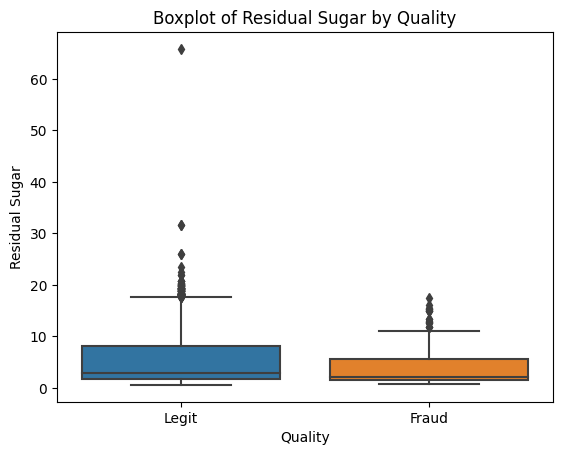

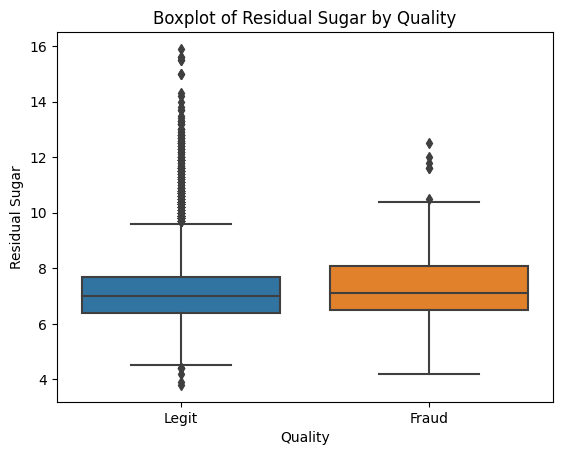

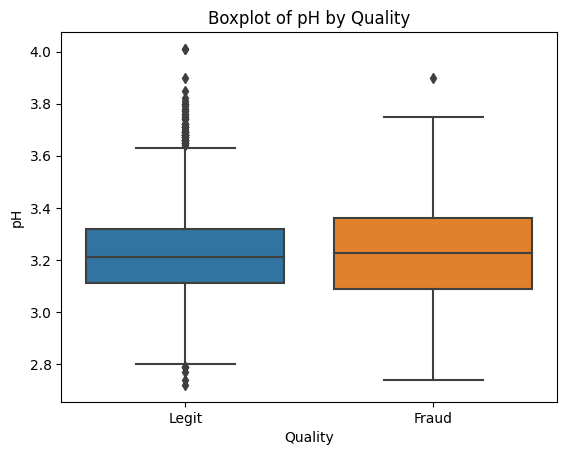

Text(0.5, 1.0, 'Scatterplot of Fixed Acidity and Volatile Acidity')

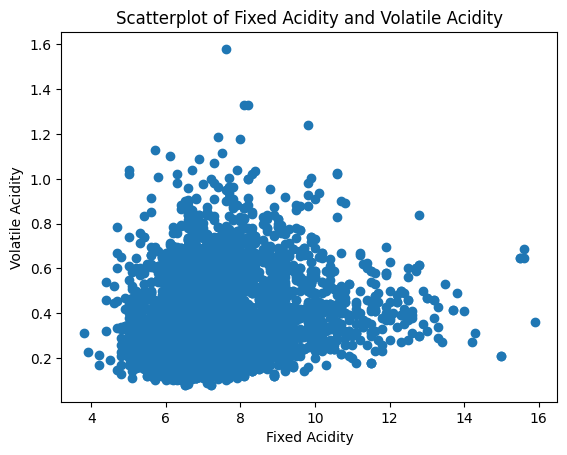

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar un histograma de la variable "fixed acidity"
plt.hist(data['fixed acidity'], bins=20)
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.title('Histogram of Fixed Acidity')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "residual sugar" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.title('Boxplot of Residual Sugar by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "fixed acidity" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.title('Boxplot of Residual Sugar by Quality')
plt.show()

# Graficar un diagrama de caja y bigotes de la variable "pH" por la variable "quality"
sns.boxplot(x=data['quality'], y=data['pH'])
plt.xlabel('Quality')
plt.ylabel('pH')
plt.title('Boxplot of pH by Quality')
plt.show()

# Graficar un gráfico de dispersión de las variables "fixed acidity" y "volatile acidity"
plt.scatter(data['fixed acidity'], data['volatile acidity'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Scatterplot of Fixed Acidity and Volatile Acidity')
plt.show()

# Graficar un gráfico de dispersión de las variables "alcohol" y "quality"

